<a href="https://colab.research.google.com/github/Nagaraj17/DataScience/blob/master/NN_MNISTDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
print (tf.__version__)

In [0]:
#!pip install tensorflow==1.12.0  ## This is required for downgrading the tensorflow for the turorial purpose.

In [3]:
print (tf.__version__)
from tensorflow.examples.tutorials.mnist import input_data

1.12.0


In [0]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

## Outlining the model

In [0]:
#There are 28*28 = 784 inputs
# We will be working with two layers
#Output is 0 t0 9 = 10

input_size= 784
output_size=10
hidden_layer_size=50 # Hidden layers with same size

tf.reset_default_graph() #Clears the memory of all the variables 
# from the previous runs (reset the computational graph)

## Declaring the placeholders

In [0]:
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

## Decalring variables

We need the  3 weights and 3 biases as we have 2 hidden layers.

The first weight size will be equal to size of input * size of the hidden layer(first hidden layer).
 

In [0]:
#============================================================
#First hidden layer
weights_1=tf.get_variable("weights_1",[input_size,hidden_layer_size])


biases_1 = tf.get_variable("biases_1",[hidden_layer_size])

##Activation function or applying non-linearity.
#currently we are applying the relu activation function
outputs_1 = tf.nn.relu(tf.matmul(inputs,weights_1)+biases_1)

#Other types of activation function are 
# tf.nn.sigmoid,tf.nn.tanh,tf.nn.relu,td.nn.softmax
#.nn stands for neural network module


In [0]:


#Second hidden layer

weights_2 = tf.get_variable("weights_2",[hidden_layer_size,hidden_layer_size])
biases_2 = tf.get_variable("biases_2",[hidden_layer_size])

outputs_2 = tf.nn.relu(tf.matmul(outputs_1,weights_2)+biases_2)


In [0]:
# Thrid hidden layer

weights_3 = tf.get_variable("weights_3",[hidden_layer_size,output_size])
biases_3 = tf.get_variable("biases_3",[output_size])

outputs_3 = tf.matmul(outputs_2,weights_3)+biases_3 # <- logitis 

##Incorporate the activation function in the last.




# tf.nn.softmax_cross_entropy_with_logits() is a function that
# applies a softmax activationand calculates a cross-entropy loss

logists here mean: unscaled probabilities 

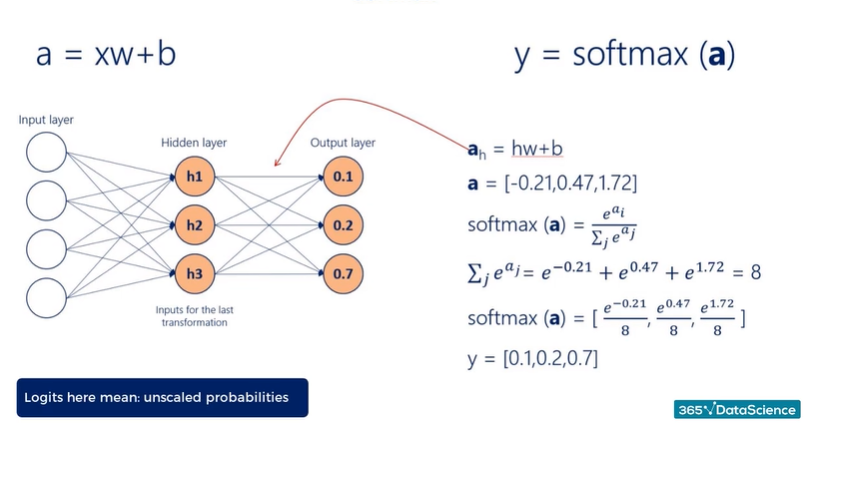



The ah is unscaled and the output produced by softmax is a probabilities



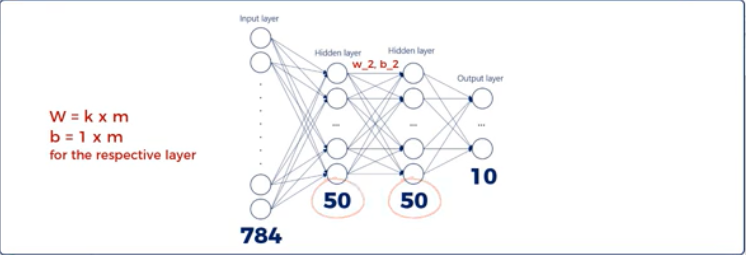



In [11]:
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs_3,labels=targets)

#Find the mean loss to enhance the performance considerably

mean_loss = tf.reduce_mean(loss)#to find the mean of the tensor


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Optimization 
We can use gradient descent as shown below

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.0.5).minimize(mean_loss)

But instead of GradientDescentOptimizer we will use ADAM which is coupled with batching.



In [0]:
optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)